#  Seoul_Bike_Sharing_Demand_Prediction

## import packages

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [61]:
data_path = r"C:\Users\priya\Downloads\archive.zip"
df = pd.read_csv(data_path, encoding = "unicode_escape")
df.shape

(8760, 14)

In [62]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)   
0  01/12/2017                254     0             -5.2           37  \
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)   
0               2.2              2000                      -17.6  \
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday   
0                      0.0           0.0            0.0  Winter  No Holiday  \
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [63]:
df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)   
8755  30/11/2018               1003    19              4.2           34  \
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)   
8755               2.6              1894                      -10.3  \
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons   
8755                      0.0           0.0            0.0  Autumn  \
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Data information

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [65]:
df.describe(include = "all")

Date  Rented Bike Count         Hour  Temperature(°C)   
count         8760        8760.000000  8760.000000      8760.000000  \
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)   
count   8760.000000       8760.000000       8760.000000  \
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)   
count                 8760.000000              8760.000000   8760.000000  \
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [66]:
df.describe(include = "all").T

count unique         top  freq         mean   
Date                         8760    365  01/12/2017    24          NaN  \
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [67]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [70]:
df['Date'] = pd.to_datetime(df['Date'])

df['Weekday'] = df['Date'].dt.day_name()
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop('Date', axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Weekday                    8760 non-null   objec

In [72]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)   
0                254     0             -5.2           37               2.2  \
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)   
0              2000                      -17.6                      0.0  \
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day Weekday   
0           0.0            0.0  Winter  No Holiday             Yes  Friday  \
1           0.0            0.0  Winter  No Holiday             Yes  Friday   
2           0.0            0.0  Winter  No Holiday             Yes  Friday   
3           0.0            0.0  Winter  No Holiday             Yes  Friday   
4           0.0            0.0  Winter  No Holiday             Yes  Friday   

   Day  Month  Year  
0    1     12  2017  
1    1     12  2017  
2    1     12  2017  
3    1     12  2017  
4    1     12  2017

## EDA

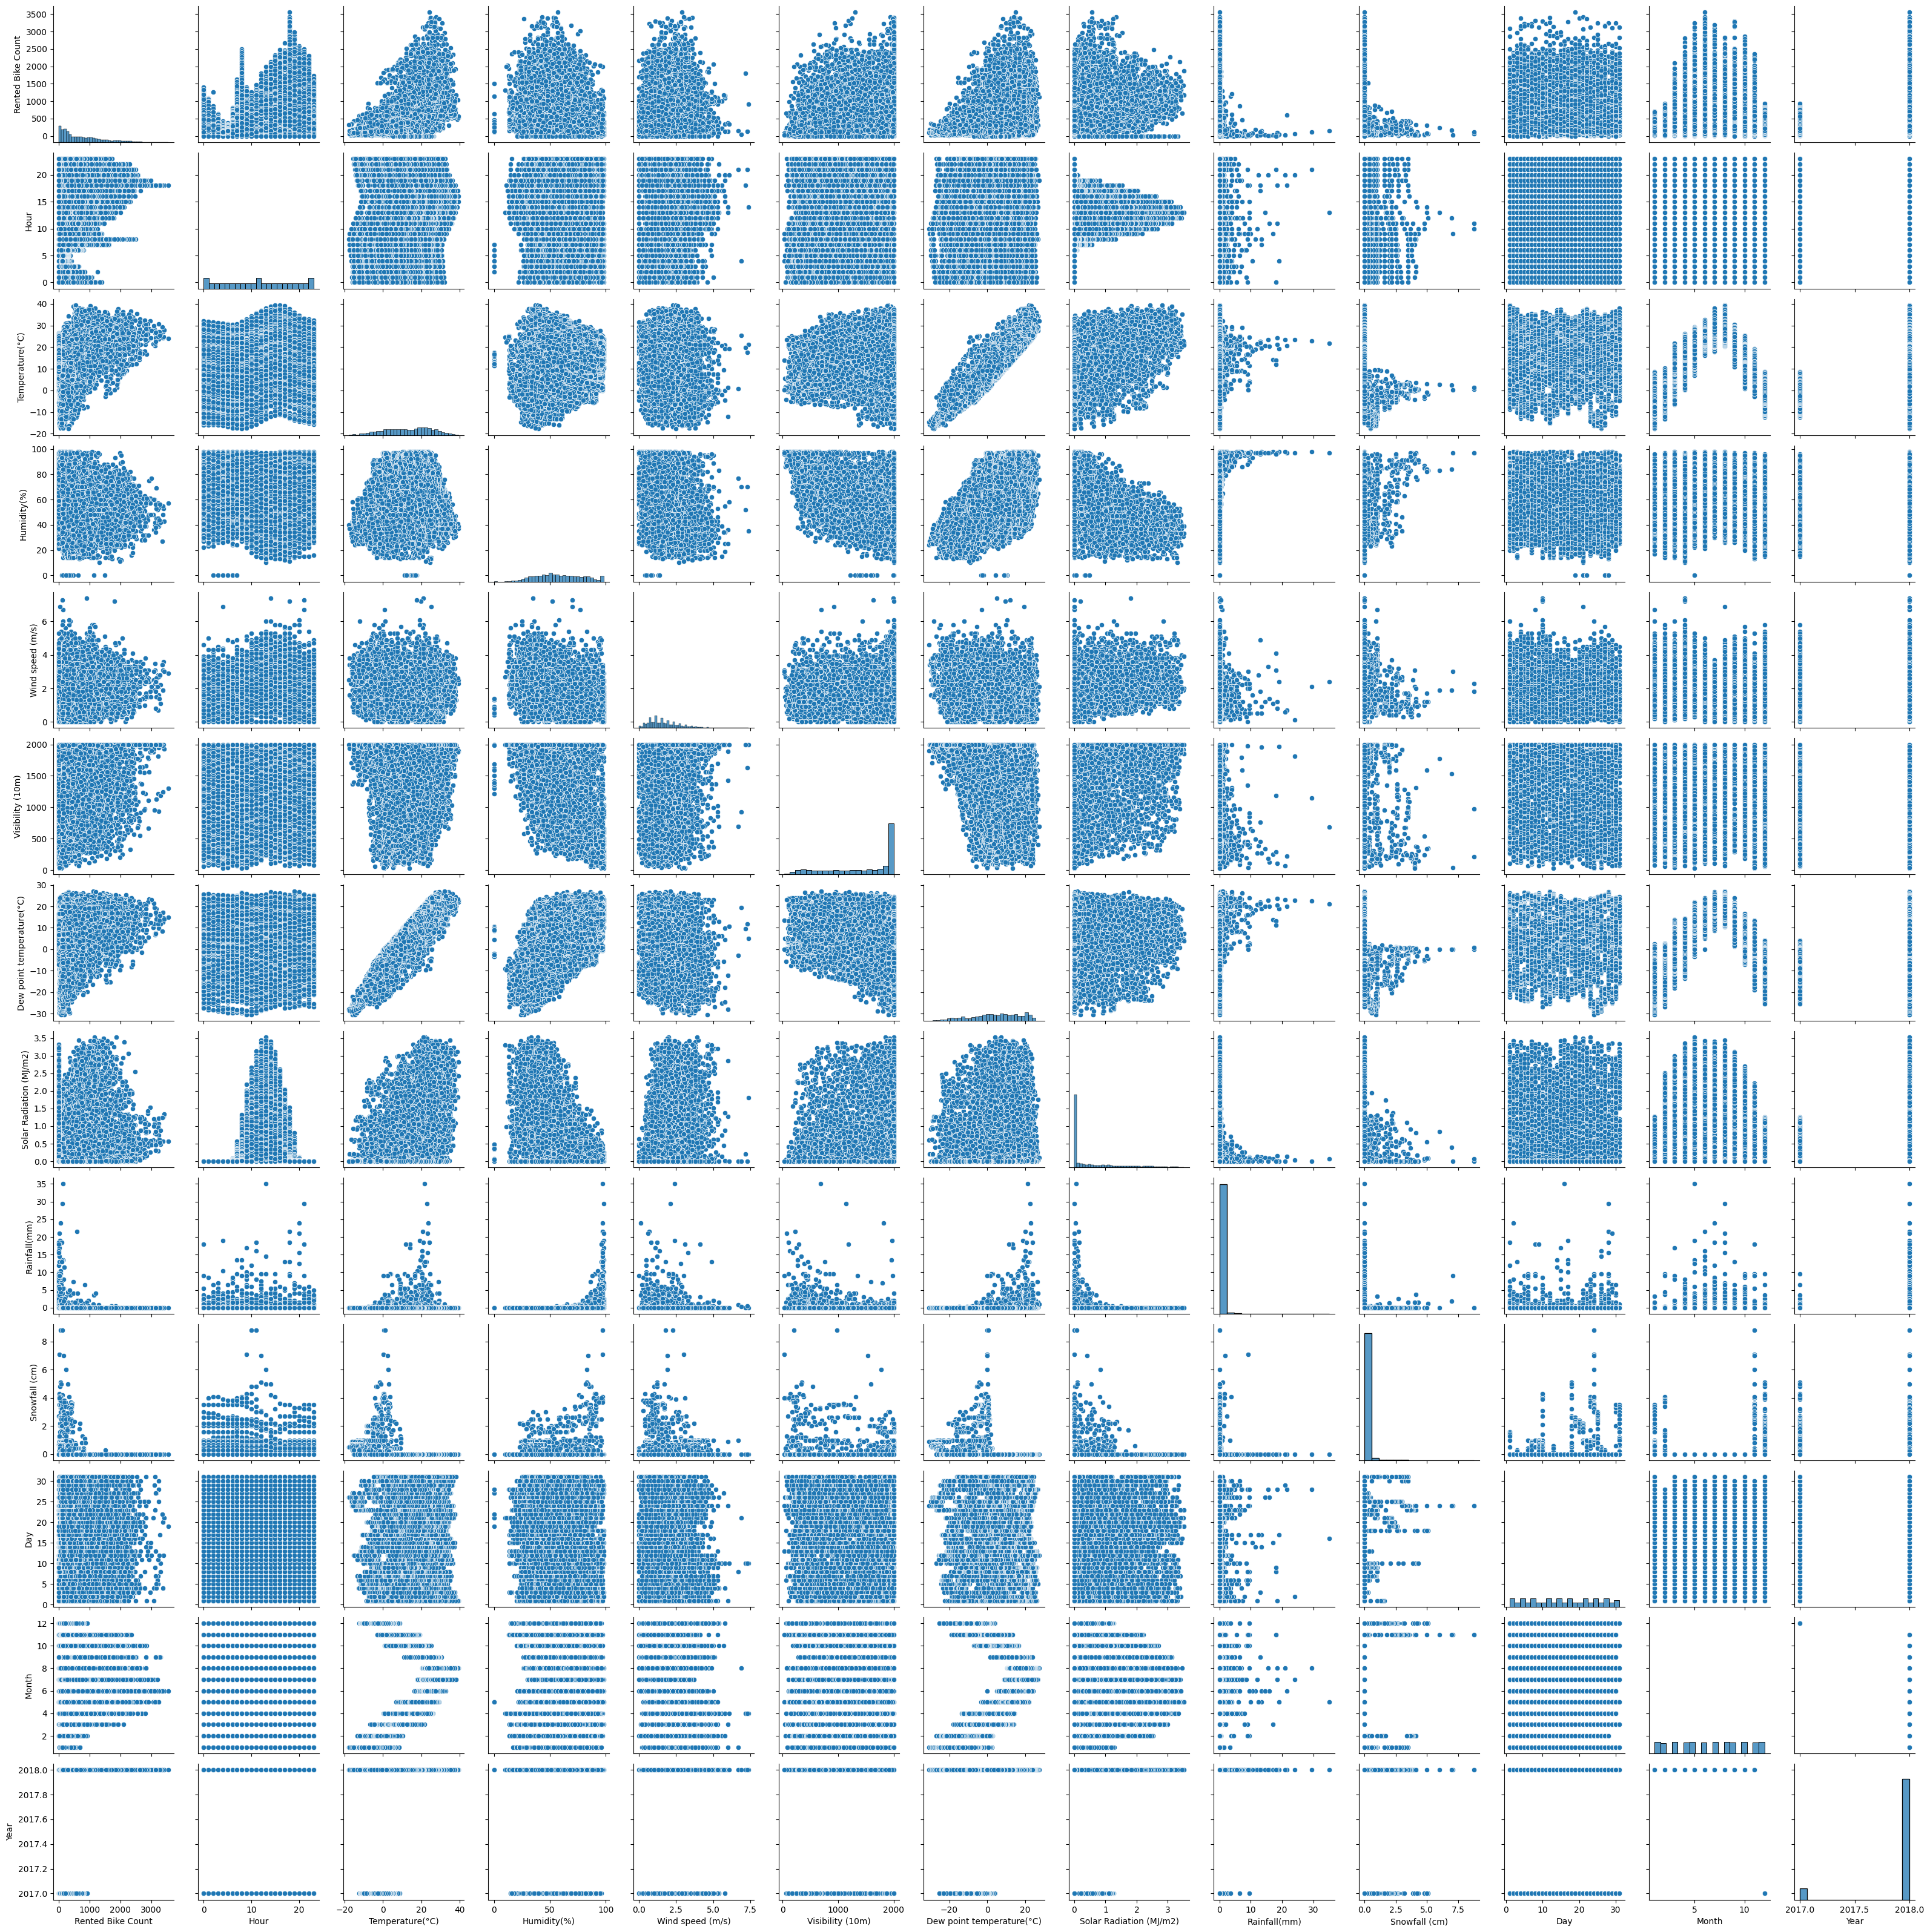

In [73]:
sns.pairplot(df)

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

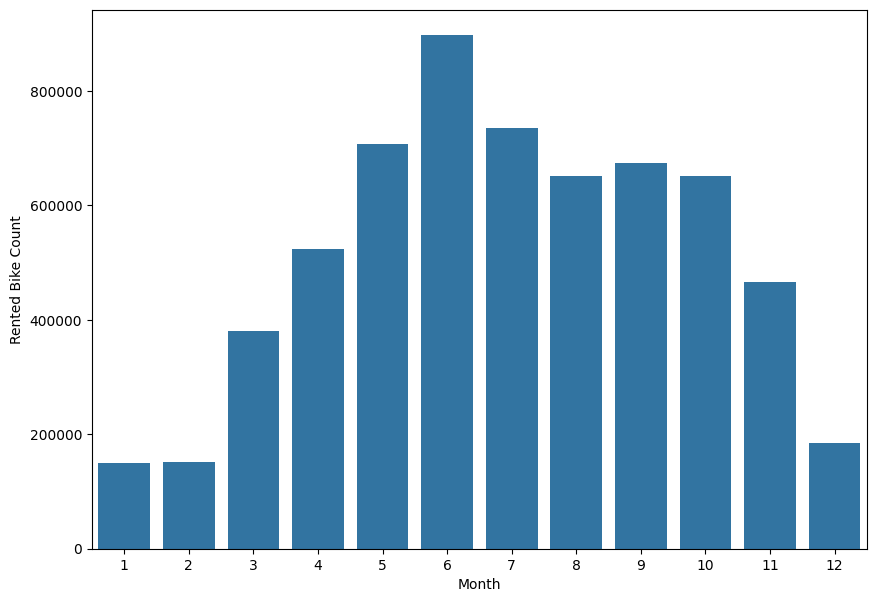

In [74]:
plt.figure(figsize = (10,7))
month = df.groupby('Month').sum().reset_index()
sns.barplot(x='Month',y='Rented Bike Count',data = month)

<Axes: xlabel='Day', ylabel='Rented Bike Count'>

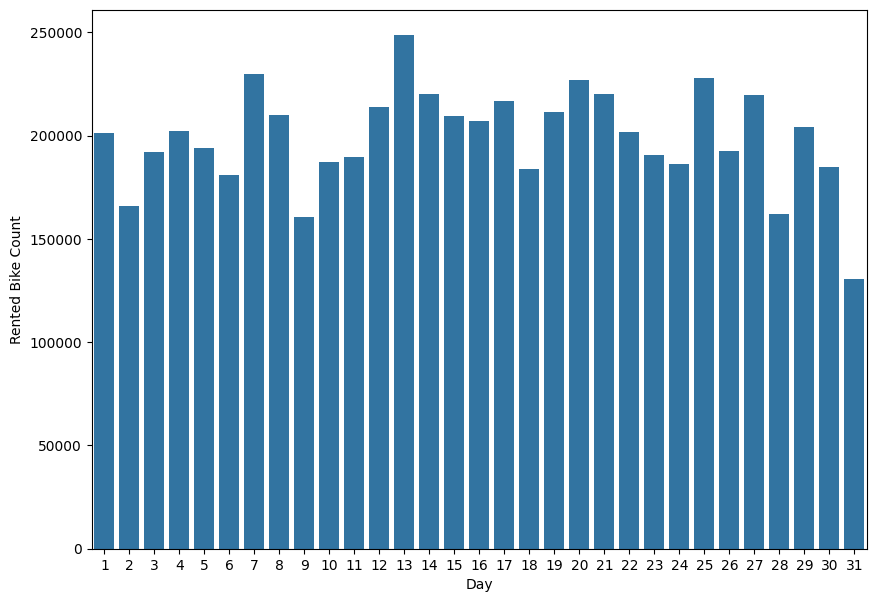

In [75]:
plt.figure(figsize = (10,7))
day = df.groupby('Day').sum().reset_index()
sns.barplot(x='Day',y="Rented Bike Count",data=day)

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

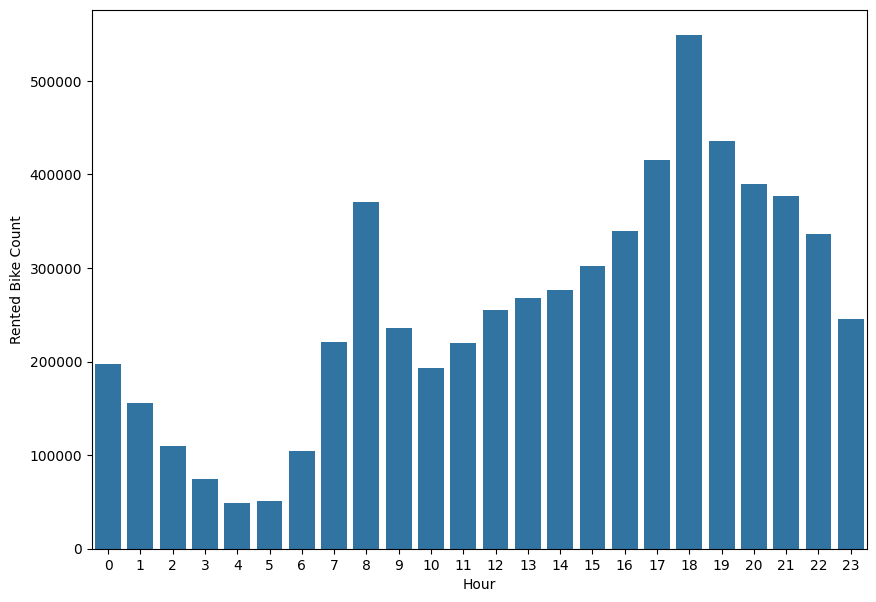

In [76]:
plt.figure(figsize=(10,7))
hour = df.groupby('Hour').sum().reset_index()
sns.barplot(x="Hour", y = "Rented Bike Count", data=hour)

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

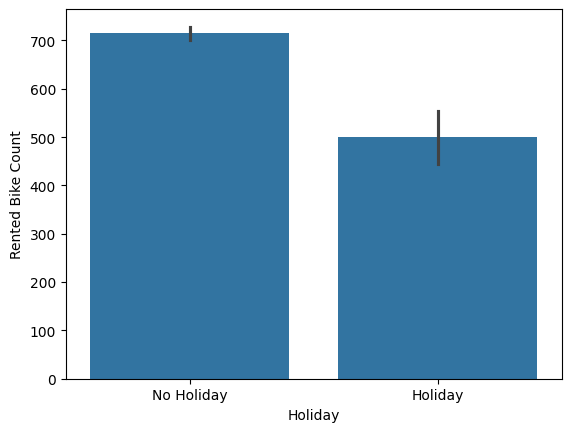

In [77]:
plt.figure9figsize=(10,7)
sns.barplot(x="Holiday", y = 'Rented Bike Count', data=df)


<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

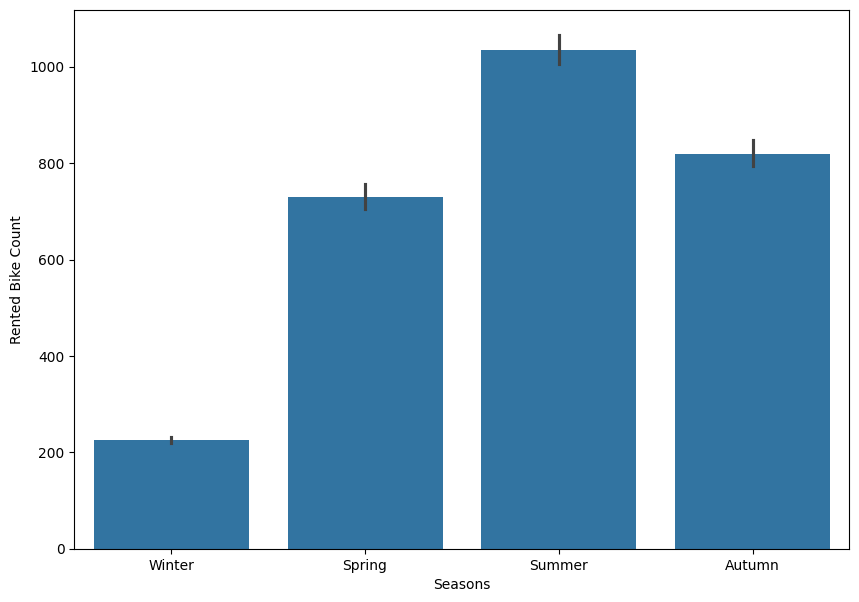

In [78]:
plt.figure(figsize=(10,7))
sns.barplot(x="Seasons", y="Rented Bike Count", data=df)

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

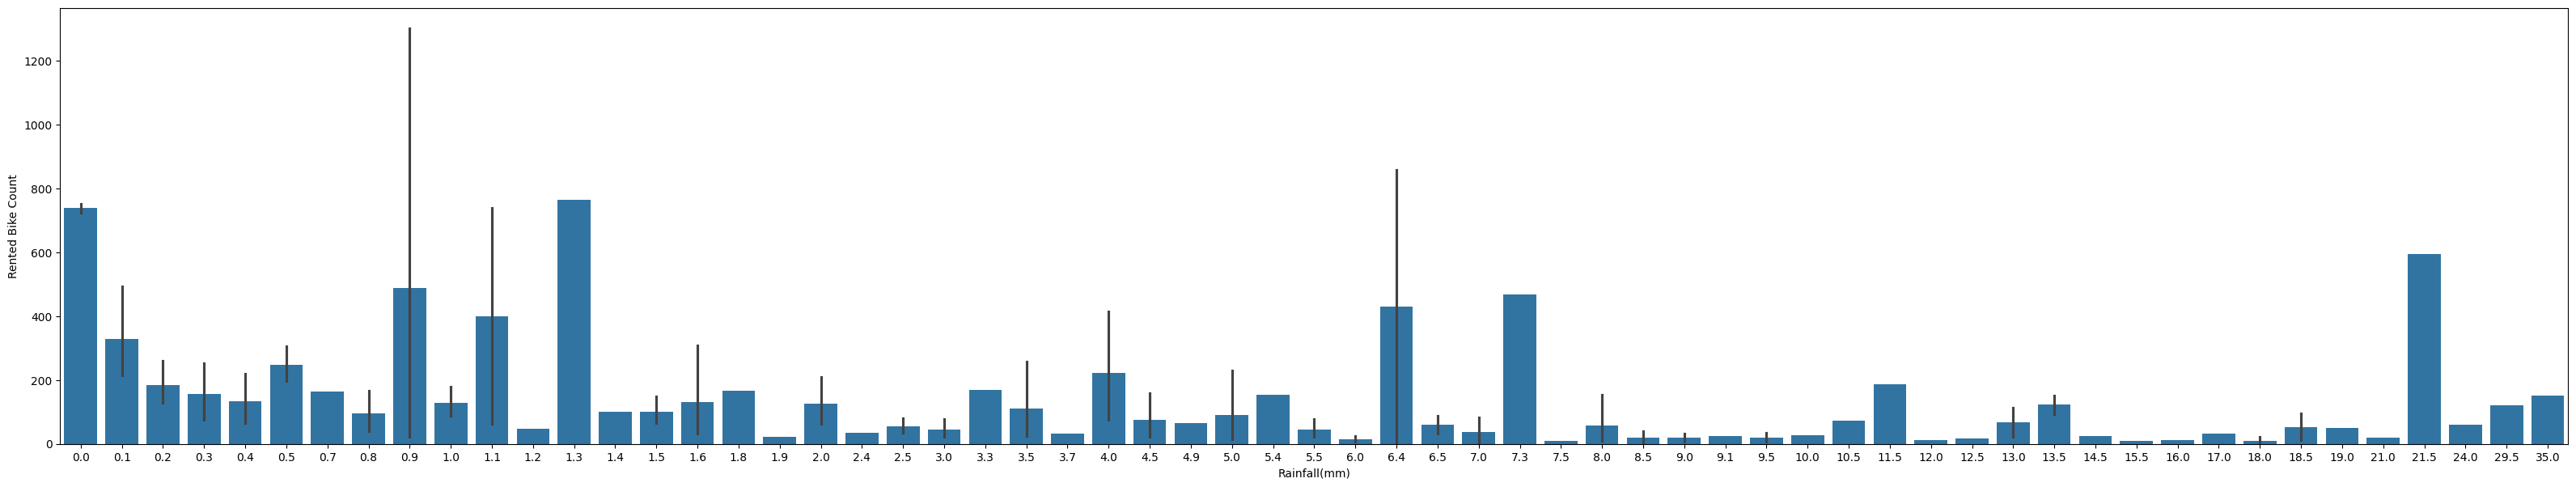

In [79]:
plt.figure(figsize=(40,7))
sns.barplot(x="Rainfall(mm)", y="Rented Bike Count", data=df)

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

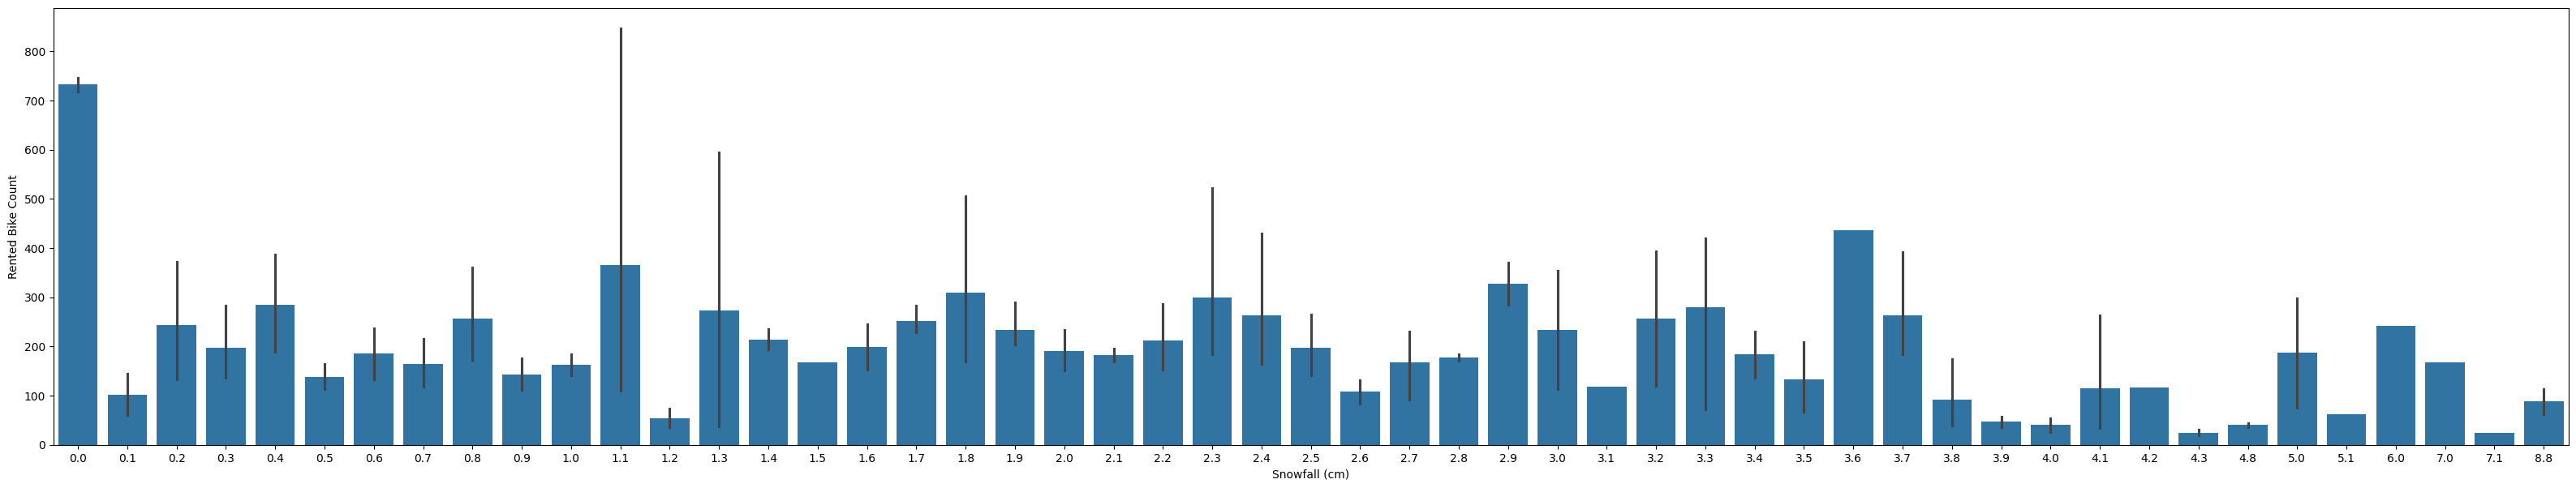

In [80]:
plt.figure(figsize=(40,7))
sns.barplot(x="Snowfall (cm)", y="Rented Bike Count", data=df)

<Figure size 4000x700 with 0 Axes>

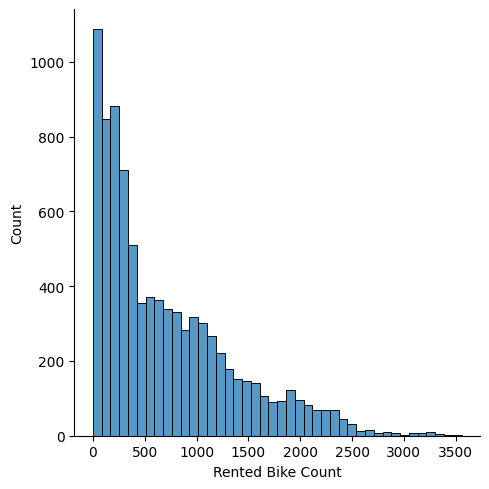

In [81]:
plt.figure(figsize=(40,7))
sns.displot(df['Rented Bike Count'])

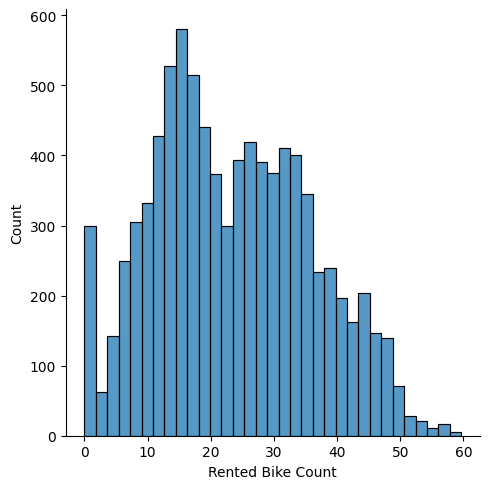

In [82]:
sns.displot(np.sqrt(df['Rented Bike Count']))

## Encoding

In [83]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Weekday', 'Day', 'Month', 'Year'],
      dtype='object')

In [84]:
cat_features = ["Seasons","Holiday","Functioning Day","Weekday"]

In [85]:
df['Holiday'].value_counts()

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [86]:
df['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

In [87]:
df['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [88]:
df['Weekday'].value_counts()

Weekday
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [89]:
df['Holiday'] = df['Holiday'].map({"No Holiday":0, "Holiday":1})
df['Functioning Day'] = df['Functioning Day'].map({"No":0, "Yes":1})

In [90]:
df_season = pd.get_dummies(df['Seasons'], drop_first=True)
df_weekday = pd.get_dummies(df['Weekday'], drop_first=True)

In [91]:
df = pd .concat((df,df_season,df_weekday), axis=1)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   int64  
 12  Functioning Day            8760 non-null   int64  
 13  Weekday                    8760 non-null   objec

In [93]:
df.drop(["Seasons",'Weekday'], axis=1,inplace=True)

## Skewed Data

In [94]:
df.skew().sort_values(ascending=True)

Functioning Day              -5.170969
Year                         -2.978262
Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
Day                           0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Summer                        1.142294
Spring                        1.142294
Rented Bike Count             1.153428
Winter                        1.176139
Solar Radiation (MJ/m2)       1.504040
Thursday                      2.046167
Monday                        2.046167
Saturday                      2.046167
Sunday                        2.046167
Tuesday                       2.046167
Wednesday                     2.046167
Holiday                       4.163603
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

In [95]:
df.corr()

Rented Bike Count          Hour  Temperature(°C)   
Rented Bike Count                   1.000000  4.102573e-01         0.538558  \
Hour                                0.410257  1.000000e+00         0.124114   
Temperature(°C)                     0.538558  1.241145e-01         1.000000   
Humidity(%)                        -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                    0.121108  2.851967e-01        -0.036252   
Visibility (10m)                    0.199280  9.875348e-02         0.034794   
Dew point temperature(°C)           0.379788  3.054372e-03         0.912798   
Solar Radiation (MJ/m2)             0.261837  1.451309e-01         0.353505   
Rainfall(mm)                       -0.123074  8.714642e-03         0.050282   
Snowfall (cm)                      -0.141804 -2.151645e-02        -0.218405   
Holiday                            -0.072338 -1.391486e-16        -0.055931   
Functioning Day                     0.203943  5.439377e-03        -0.050170   
Day                                 0.022291  1.450952e-16         0.015645   
Month                               0.133514  1.749134e-15         0.216183   
Year                                0.215162  2.336763e-14         0.377796   
Spring                              0.022888 -1.159917e-15         0.007960   
Summer                              0.296549  8.578102e-16         0.665846   
Winter                             -0.424925 -1.697335e-15        -0.738720   
Monday                              0.016407 -2.598146e-17         0.005682   
Saturday                            0.003114 -6.704892e-18         0.005267   
Sunday                             -0.050208 -1.801940e-17         0.004050   
Thursday                           -0.008783  2.697672e-17        -0.009461   
Tuesday                            -0.010506 -8.276352e-18         0.002475   
Wednesday                           0.022591 -1.471933e-17         0.005961   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)   
Rented Bike Count            -0.199780          0.121108          0.199280  \
Hour                         -0.241644          0.285197          0.098753   
Temperature(°C)               0.159371         -0.036252          0.034794   
Humidity(%)                   1.000000         -0.336683         -0.543090   
Wind speed (m/s)             -0.336683          1.000000          0.171507   
Visibility (10m)             -0.543090          0.171507          1.000000   
Dew point temperature(°C)     0.536894         -0.176486         -0.176630   
Solar Radiation (MJ/m2)      -0.461919          0.332274          0.149738   
Rainfall(mm)                  0.236397         -0.019674         -0.167629   
Snowfall (cm)                 0.108183         -0.003554         -0.121695   
Holiday                      -0.050278          0.023017          0.031773   
Functioning Day              -0.020800          0.005037         -0.026000   
Day                          -0.029044         -0.031977         -0.101759   
Month                         0.139875         -0.156710          0.064874   
Year                          0.035925         -0.003781          0.052381   
Spring                        0.015694          0.083855         -0.187498   
Summer                        0.192595         -0.064698          0.061958   
Winter                       -0.238295          0.109186          0.008616   
Monday                       -0.000535         -0.009798         -0.019150   
Saturday                     -0.027435          0.022035         -0.010045   
Sunday                        0.005544         -0.050739         -0.024516   
Thursday                      0.049045          0.012990         -0.013438   
Tuesday                      -0.016367          0.002211          0.036138   
Wednesday                     0.014703          0.031333          0.036129   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)   
Rented Bike Count  

<Axes: >

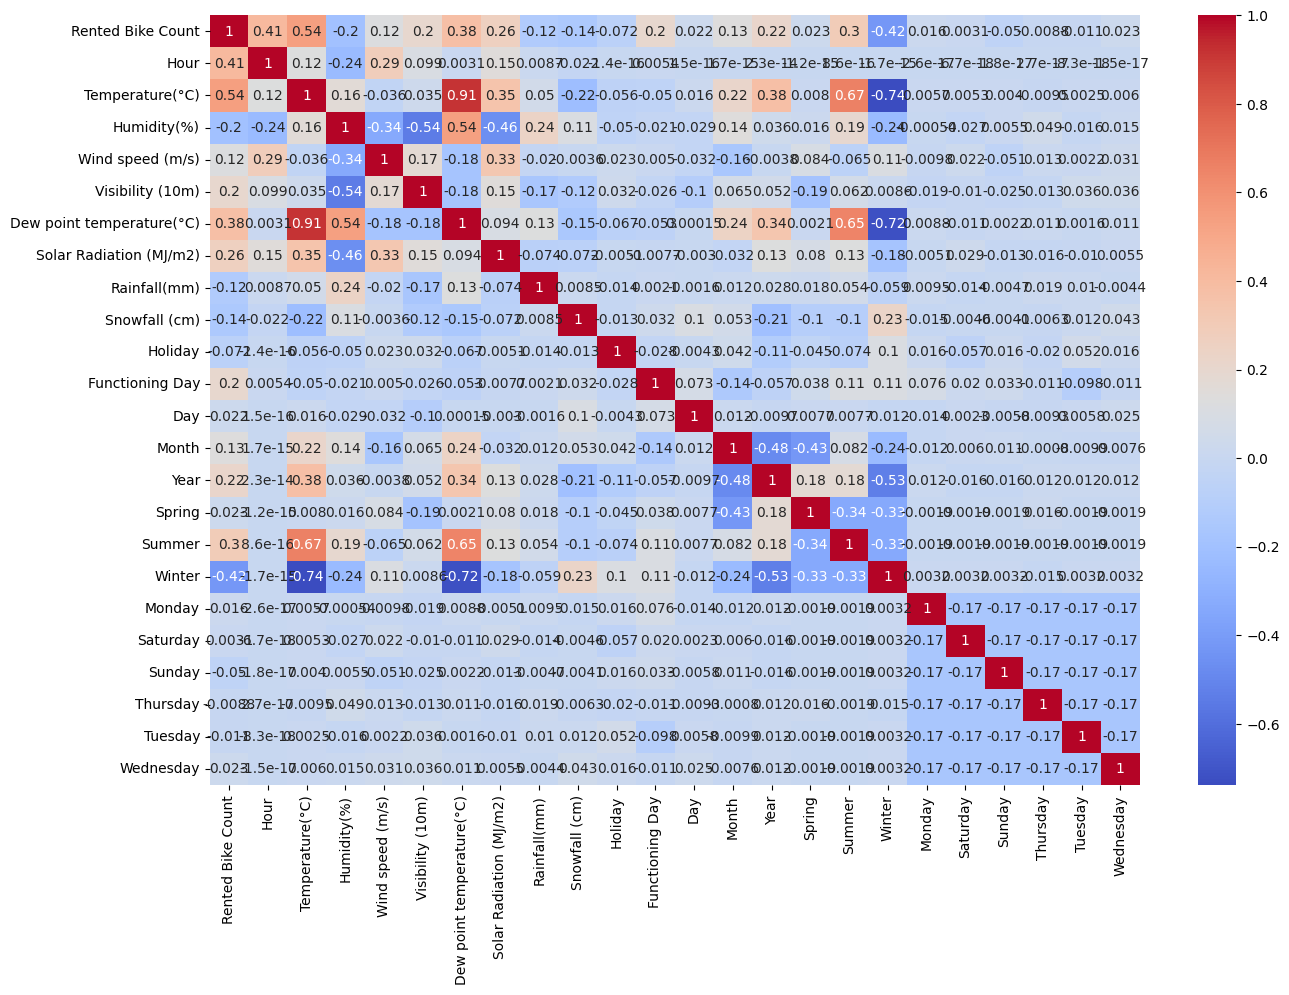

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [97]:
def get_vif(df):
    vif=pd.DataFrame()
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range (df.shape[1])]
    return vif

In [98]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Spring', 'Summer', 'Winter',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [99]:
pip install statsmodels


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [101]:
not_for_vif=['Day','Month','Year','Rented Bike Count','Dew point temperature(°C)']
get_vif(df[[i for i in df.describe().columns if i not in not_for_vif]])

variables        VIF
0                     Hour   4.123293
1          Temperature(°C)   3.371268
2              Humidity(%)  11.141082
3         Wind speed (m/s)   4.681143
4         Visibility (10m)   6.534147
5  Solar Radiation (MJ/m2)   2.428143
6             Rainfall(mm)   1.082300
7            Snowfall (cm)   1.121115
8                  Holiday   1.055271
9          Functioning Day  18.709066

In [102]:
df.drop(['Dew point temperature(°C)'], axis=1, inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Day                      8760 non-null   int32  
 12  Month                    8760 non-null   int32  
 13  Year                     8760 non-null   int32  
 14  Spring                  

In [104]:
df.shape

(8760, 23)

## Split Data for Training and Testing

In [105]:
X = df.drop("Rented Bike Count", axis=1)
y = df['Rented Bike Count']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2023)

In [107]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(7008, 22) (1752, 22) (7008,) (1752,)


## Scaling

In [108]:
# feature scaling
# 1. standard_scalar
# 2. min_max scalar

In [109]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)# for training
X_test = sc.transform(X_test)# for prediction

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [111]:
# now our is not in dataframe it is converted   in numpy array

In [112]:
X_train[:2]

array([[ 1.51118219,  0.05556521, -2.10940521,  0.46658045,  0.92262892,
        -0.65681529, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -0.41966071, -0.72590612,  0.30459857,  1.74132735, -0.58152447,
        -0.57866842, -0.40630934, -0.40916536, -0.4075004 ,  2.46842407,
        -0.40081071, -0.41367015],
       [ 0.93371229,  1.00382241, -0.25185689,  1.82005277,  0.92262892,
         0.82386154, -0.12916836, -0.17535463, -0.22754885,  0.18254726,
        -0.41966071, -0.14689974,  0.30459857, -0.57427456,  1.71961809,
        -0.57866842, -0.40630934, -0.40916536, -0.4075004 , -0.40511677,
         2.49494334, -0.41367015]])

In [113]:
sc.mean_

array([1.15323916e+01, 1.28319920e+01, 5.81522546e+01, 1.71738014e+00,
       1.44041795e+03, 5.67796804e-01, 1.52539954e-01, 7.52283105e-02,
       4.92294521e-02, 9.67751142e-01, 1.56847888e+01, 6.50742009e+00,
       2.01791510e+03, 2.48002283e-01, 2.52711187e-01, 2.50856164e-01,
       1.41695205e-01, 1.43407534e-01, 1.42408676e-01, 1.40981735e-01,
       1.38413242e-01, 1.46118721e-01])

In [114]:
sc.scale_

array([6.92676802e+00, 1.20220548e+01, 2.04570722e+01, 1.03437653e+00,
       6.06508248e+02, 8.64469525e-01, 1.18093896e+00, 4.29006703e-01,
       2.16346743e-01, 1.76660323e-01, 8.78039972e+00, 3.45419336e+00,
       2.78737249e-01, 4.31853159e-01, 4.34566730e-01, 4.33505881e-01,
       3.48737257e-01, 3.50487965e-01, 3.49468804e-01, 3.48002709e-01,
       3.45333196e-01, 3.53225198e-01])

## Traning  ML Model

#### Linear Regression Model

In [125]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [126]:
lr

LinearRegression()

### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [127]:
lr.fit(X_train,y_train)

LinearRegression()

In [128]:
y_pred = lr.predict(X_test)

In [129]:
y_pred

array([  -3.42150244, 1022.33291293, 1474.26387368, ..., 1524.82148315,
        547.90926416,  739.64325466])

## Model Evaluation

In [130]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [131]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt (MSE)
MAE = mean_absolute_error(y_test,y_pred)
R2 = r2_score(y_test,y_pred)

print("MSE :", MSE)
print("RMSE:",RMSE)
print("MAE :", MAE)
print("R2 :",R2)

MSE : 186569.9819319257
RMSE: 431.9374745630734
MAE : 330.21078355249136
R2 : 0.5429221393038917


In [132]:
def get_metrics(y_true,y_pred,model_name):
    MSE = mean_squared_error(y_test,y_pred)
    RMSE= np.sqrt(MSE)
    MAE =  mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    
    print(f"{model_name}: [MSE':{round(MSE,3)},'RMSE':{round(RMSE,3)}, 'MAE': {round(MAE,3)}, 'R2': {round(R2,3)}]")
        

In [133]:
get_metrics(y_test,y_pred,lr)

LinearRegression(): [MSE':186569.982,'RMSE':431.937, 'MAE': 330.211, 'R2': 0.543]


## Train Multiple Models

In [134]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [135]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [136]:
rir = Ridge().fit(X_train, y_train)
y_pred_rir = rir.predict(X_test) 

lar = Lasso().fit(X_train, y_train)
y_pred_lar = lar.predict(X_test) 

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly, y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train, y_train)
y_pred_svr = svr.predict(X_test) 

knnr = KNeighborsRegressor().fit(X_train, y_train)
y_pred_knnr = knnr.predict(X_test) 

dtr = DecisionTreeRegressor().fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test) 

rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test) 

xgbr = XGBRegressor().fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test) 

In [137]:
get_metrics(y_test, y_pred, "LinearRegression")
get_metrics(y_test, y_pred_rir, "Ridge")
get_metrics(y_test, y_pred_lar, "Lasso")
get_metrics(y_test, y_pred_poly, "PolynomialFeatures")
get_metrics(y_test, y_pred_svr, "SVR")
get_metrics(y_test, y_pred_knnr, "KNeighborsRegressor")
get_metrics(y_test, y_pred_dtr, "DecisionTreeRegressor")
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")
get_metrics(y_test, y_pred_xgbr, "XGBRegressor")

LinearRegression: [MSE':186569.982,'RMSE':431.937, 'MAE': 330.211, 'R2': 0.543]
Ridge: [MSE':186567.569,'RMSE':431.935, 'MAE': 330.2, 'R2': 0.543]
Lasso: [MSE':187028.139,'RMSE':432.468, 'MAE': 330.257, 'R2': 0.542]
PolynomialFeatures: [MSE':126526.378,'RMSE':355.705, 'MAE': 248.835, 'R2': 0.69]
SVR: [MSE':313071.334,'RMSE':559.528, 'MAE': 381.349, 'R2': 0.233]
KNeighborsRegressor: [MSE':100530.621,'RMSE':317.066, 'MAE': 207.508, 'R2': 0.754]
DecisionTreeRegressor: [MSE':60855.091,'RMSE':246.688, 'MAE': 134.577, 'R2': 0.851]
RandomForestRegressor: [MSE':30141.421,'RMSE':173.613, 'MAE': 99.638, 'R2': 0.926]
XGBRegressor: [MSE':24164.912,'RMSE':155.451, 'MAE': 95.454, 'R2': 0.941]


## Visualize Model Prediction

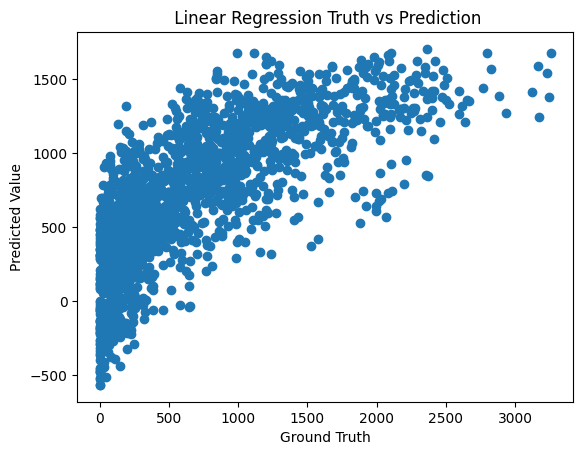

In [150]:
plt.scatter(y_test,y_pred)
plt.title (" Linear Regression Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Value")
plt.show()

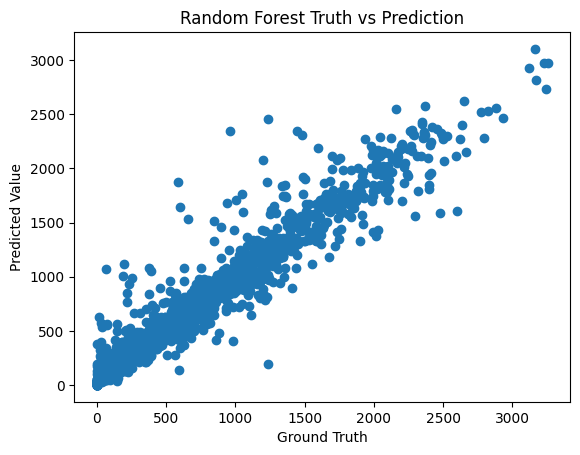

In [151]:
plt.scatter(y_test,y_pred_rfr)
plt.title("Random Forest Truth vs Prediction")
plt.xlabel("Ground Truth")
plt.ylabel("Predicted Value")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

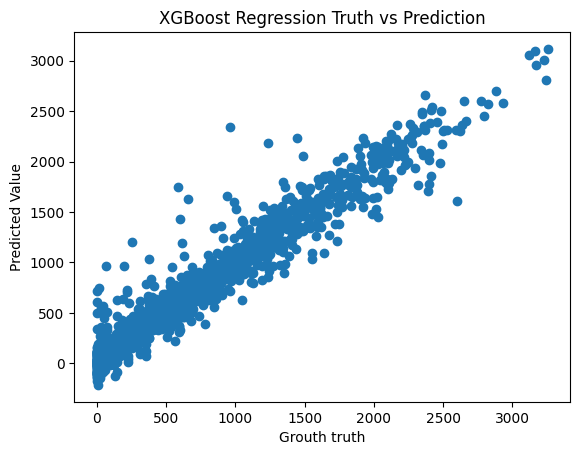

In [152]:
plt.scatter(y_test,y_pred_xgbr)
plt.title("XGBoost Regression Truth vs Prediction")
plt.xlabel("Grouth truth")
plt.ylabel("Predicted Value")
plt.show

## Hyperparameter Tuning For Random Forest Regressor

In [157]:
 from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =200,num=10)]

# number of features to consider at every split
max_features = ['auto','sqrt']

# maximum number of level  of levels allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120,num=12)]

#maximum number of samples required allowed in each decision tree
max_depth = [int(x) for x in np.linspace(10,120,num=12)]

# maximum number of samples required to split a  node
max_samples = [2,5,10]

#maximum number of samples required to spite node  
max_samples = [2,5,4]

# minimum number of samples required to each to leaf node
min_samples_leaf = [1,2,4]

# method of selecting samples for training each tree
bootstrap =  [True,False]

# creat the random grid 
random_grid = {'n_estimators': n_estimators,
               'max_features' : max_features,
               'max_samples' : max_samples,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}
              
              
              
              


In [158]:
import time 
start_time = time.time()

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV (estimator=rf, 
                               param_distributions=random_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=51)

rf_random.fit(X_train, y_train)
y_pred_rf_random = rf_random.predict(X_test)

print("Time taken to training using randomize seacrh :", time.time()-start_time )

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_features=auto, max_samples=5, min_samples_leaf=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, max_samples=5, min_samples_leaf=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, max_samples=5, min_samples_leaf=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=5, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=5, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=5, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.0s
[CV]

[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=4, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=4, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=4, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=False, max_features=sqrt, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=sqrt, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_sample

[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=auto, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=auto, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_leaf=2, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_l

[CV] END bootstrap=True, max_features=sqrt, max_samples=5, min_samples_leaf=1, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_leaf=4, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_leaf=4, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_features=sqrt, max_samples=2, min_samples_leaf=4, n_estimators=200; total time=   0.1s
[CV] END bootstrap=False, max_features=auto, max_samples=4, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=auto, max_samples=4, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=auto, max_samples=4, min_samples_leaf=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=auto, max_samples=4, min_samples_leaf=4, n_estimators=200; total time=   0.0s
[CV] END bootstrap=False, max_features=auto, max_samples=4, min_samp

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
147 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

Time taken to training using randomize seacrh : 21.17776107788086


In [159]:
get_metrics(y_test,y_pred_rf_random,"RandomForestRegressor fine tunning")

RandomForestRegressor fine tunning: [MSE':335118.732,'RMSE':578.894, 'MAE': 463.269, 'R2': 0.179]


In [161]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 1,
 'max_samples': 5,
 'max_features': 'sqrt',
 'bootstrap': True}

In [164]:
rf_tuned = RandomForestRegressor(n_estimators =2000,
                                min_samples_leaf=1,
                                max_features = 'sqrt',
                                max_depth = 90,
                                bootstrap = True)
rf_tuned.fit(X_train,y_train)
y_pred_tuned = rf_tuned.predict(X_test)

get_metrics(y_test,y_pred_tuned,"RandomForestRegressor Fine tuning with best parametr")

RandomForestRegressor Fine tuning with best parametr: [MSE':38285.392,'RMSE':195.667, 'MAE': 126.414, 'R2': 0.906]


## hyperparameter Tuning For XGBoost Regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

import time 
start_time = time.time()
params = {'max_depth': [3,5,6,10,15,20],
         'learning_rate' : [0.01,0.1,0.2,0.3],
         'subsample':np.arange(0.4,1.0,1.0),
         'colsample_bylevel':np.arange(0.4,1.0,0.1),
         'n_estimators':[100,500,1000]}

xgbr = XGBRegressor (seed = 20)
rscv = RandomizedSearchCV(estimator = xgbr,
                         param_distributions = params,
                         scoring = 'neg_mean_squared_error',
                         n_iter = 25,
                         cv=5,
                         verbose=1)
                
rscv.fit(X_train,y_train)

y_pred_xgb_random = rscv.predict(X_test)

get_metrics(y_test,y_pred_xgb_random,"XGBRegressor with best parameters")

print("Time taken to traning using randomize  search :",time.time()-start_time)

print("Best parameters:",rscv.best_params_)
            